In [132]:
# Tratamiento de datos

import pandas as pd  # Manipulación y análisis de datos.
import numpy as np  # Soporte para vectores y matrices.

# Gráficos

import matplotlib.pyplot as plt  # Creación de gráficos estáticos, animados e interactivos.
from matplotlib import style  # Personalización del estilo de los gráficos.

# Preprocesado y modelado

from scipy.stats import pearsonr  # Coeficiente de correlación de Pearson.
from sklearn.model_selection import train_test_split  # División de datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para evaluar modelos.
import statsmodels.api as sm  # Modelos estadísticos y econometricos.
import statsmodels.formula.api as smf  # Modelo estadísticos con fórmulas.
from statsmodels.stats.anova import anova_lm  # Análisis de varianza.
from scipy import stats  # Funciones estadísticas.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler  # Preprocesamiento de datos.
import category_encoders  # Codificación de variables categóricas.
import missingno as msno  # Visualización de datos faltantes.
from sklearn.pipeline import Pipeline  # Cadena de transformaciones con un estimador final.
from sklearn.experimental import enable_iterative_imputer  # Permitir uso de IterativeImputer.
from sklearn.impute import IterativeImputer  # Imputación de datos faltantes.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de ensamble.
from sklearn.model_selection import GridSearchCV, cross_val_score  # Búsqueda de hiperparámetros y validación cruzada.

# Deep Learning

import tensorflow as tf  # Biblioteca de Deep Learning.
from tensorflow.keras import layers, models  # Construcción de modelos de deep learning.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para controlar el entrenamiento.
from keras.models import Sequential  # Creación de modelos secuenciales.
from keras.layers import Dense, Dropout, BatchNormalization  # Capas para construir modelos.
from keras import regularizers  # Regularización de modelos.

In [133]:
# Ruta del archivo
file_path_dataset = "https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/df_central_2_1.csv"

# Leer el archivo CSV 
df_central = pd.read_csv(file_path_dataset, delimiter=',') 

df_central.tail(10)

,Unnamed: 0,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_PREV_LOW,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25056,25056,2023-11-15,15,22.9,5.740,17.160,1,0,1,2,False,2023,11,15
25057,25057,2023-11-15,16,28.8,3.356,25.444,1,0,1,2,False,2023,11,15
25058,25058,2023-11-15,17,30.6,2.224,28.376,1,0,1,2,False,2023,11,15
25059,25059,2023-11-15,18,15.7,4.066,11.634,1,0,1,2,False,2023,11,15
25060,25060,2023-11-15,19,0.4,0.008,0.392,1,0,1,2,False,2023,11,15
25061,25061,2023-11-15,20,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25062,25062,2023-11-15,21,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25063,25063,2023-11-15,22,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25064,25064,2023-11-15,23,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25065,25065,2023-11-15,24,0.0,0.000,0.000,0,0,0,2,False,2023,11,15


In [134]:
df_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25066 entries, 0 to 25065
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25066 non-null  int64  
 1   Fecha          25066 non-null  object 
 2   Period         25066 non-null  int64  
 3   PREVISION      25066 non-null  float64
 4   E_SIMEL        25066 non-null  float64
 5   DESVIO         25066 non-null  float64
 6   f_PREV_HIGH    25066 non-null  int64  
 7   f_PREV_LOW     25066 non-null  int64  
 8   f_RUN          25066 non-null  int64  
 9   Dia_Semana     25066 non-null  int64  
 10  Es_fin_semana  25066 non-null  bool   
 11  Año            25066 non-null  int64  
 12  Mes            25066 non-null  int64  
 13  Día            25066 non-null  int64  
dtypes: bool(1), float64(3), int64(9), object(1)
memory usage: 2.5+ MB


In [135]:
# Eliminamos las columnas que no utilizaremos para el modelado

df_central.drop(['Unnamed: 0', 'f_PREV_LOW'], axis=1, inplace=True)

# Convertimos la columna 'Fecha' a Datetime

df_central['Fecha'] = pd.to_datetime(df_central['Fecha'])

# Convertimos la columna 'f_RUN' a Booleano

df_central['f_RUN'] = df_central['f_RUN'].astype(bool)

df_central.head()


,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.0,0.0,0,False,4,False,2021,1,1
1,2021-01-01,2,0.0,0.0,0.0,0,False,4,False,2021,1,1
2,2021-01-01,3,0.0,0.0,0.0,0,False,4,False,2021,1,1
3,2021-01-01,4,0.0,0.0,0.0,0,False,4,False,2021,1,1
4,2021-01-01,5,0.0,0.0,0.0,0,False,4,False,2021,1,1


In [136]:
df_central.head(24)

,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.000,0.000,0,False,4,False,2021,1,1
1,2021-01-01,2,0.0,0.000,0.000,0,False,4,False,2021,1,1
2,2021-01-01,3,0.0,0.000,0.000,0,False,4,False,2021,1,1
3,2021-01-01,4,0.0,0.000,0.000,0,False,4,False,2021,1,1
4,2021-01-01,5,0.0,0.000,0.000,0,False,4,False,2021,1,1
5,2021-01-01,6,0.0,0.000,0.000,0,False,4,False,2021,1,1
6,2021-01-01,7,0.0,0.000,0.000,0,False,4,False,2021,1,1
7,2021-01-01,8,0.0,0.000,0.000,0,False,4,False,2021,1,1
8,2021-01-01,9,0.0,0.000,0.000,0,False,4,False,2021,1,1
9,2021-01-01,10,0.0,0.000,0.000,0,False,4,False,2021,1,1


In [137]:
# Dividimos el DataFrame en dos: el primero para hacer el entrenamiento y prueba del modelo de predicción
# y el segundo para hacer las imputaciones, reentrenos de modelos y hacer las pruebas de predicción como si fuera un ejemplo real de datos nuevos.

df_inicio = df_central[df_central['Fecha'] <= '2023-10-31']
df_final = df_central[df_central['Fecha'] >= '2023-11-05']

In [138]:
# Con que ya tenemos columnas específicas que marcan los días, meses y años, eliminamos de los dos DataFrames
# la columna 'Fecha' para poder utilizar modelos de Random Forest y Gradient Boosting


df_inicio = df_inicio.drop('Fecha', axis=1)
df_final = df_final.drop('Fecha', axis=1)

In [139]:
X_inicio = df_inicio.drop('E_SIMEL', axis=1)  # Excluimos la varible objetivo E_SIMEL del conjunto de entrenamiento 
y_inicio = df_inicio['E_SIMEL']  # Definimos la variable objetivo E_SIMEL del conjunto de prueba


# Dividimos el conjunto de datos en entrenamiento (80%) y prueba (20%)


X_train_inicio, X_test_inicio, y_train_inicio, y_test_inicio = train_test_split(X_inicio, y_inicio, test_size=0.2, random_state=42)


In [140]:
"""
# Definimos el modelo de Gradient Boosting

gb_r = GradientBoostingRegressor(random_state=42)

# Definimos en qué parámetros se basará la prueba
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', None],
    'learning_rate': [0.01, 0.1],
}

# Configuramos el  GridSearchCV para la búsqueda de los mejores Hiperparámetros

grid_search = GridSearchCV(estimator=gb_r, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ejecutamos la búsqueda

grid_search.fit(X_train_inicio, y_train_inicio)

# Imprimimos para visualizar los Hiperparámetros y la puntuación

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
"""

'\n# Definimos el modelo de Gradient Boosting\n\ngb_r = GradientBoostingRegressor(random_state=42)\n\n# Definimos en qué parámetros se basará la prueba\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [10, 20, 30],\n    \'min_samples_split\': [2, 4, 6],\n    \'min_samples_leaf\': [1, 2, 3],\n    \'max_features\': [\'sqrt\', None],\n    \'learning_rate\': [0.01, 0.1],\n}\n\n# Configuramos el  GridSearchCV para la búsqueda de los mejores Hiperparámetros\n\ngrid_search = GridSearchCV(estimator=gb_r, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring=\'neg_mean_squared_error\')\n\n# Ejecutamos la búsqueda\n\ngrid_search.fit(X_train_inicio, y_train_inicio)\n\n# Imprimimos para visualizar los Hiperparámetros y la puntuación\n\nprint("Mejores parámetros:", grid_search.best_params_)\nprint("Mejor puntuación:", grid_search.best_score_)\n'

In [141]:
# Creamos el modelo de GradientBoostingRegressor

gb_r_optimizado = GradientBoostingRegressor(n_estimators=200, max_depth=10, learning_rate= 0.1, 
                                            max_features =  None, min_samples_leaf = 3, min_samples_split = 2, random_state=42)

# Entrenamos el modelo con los resultados de los mejores Hiperparámetros

gb_r_optimizado.fit(X_train_inicio, y_train_inicio)


GradientBoostingRegressor(max_depth=10, min_samples_leaf=3, n_estimators=200,
                          random_state=42)

In [142]:
# Hacemos las predicciones en el conjunto de prueba

y_pred_test = gb_r_optimizado.predict(X_test_inicio)

# Calculamos MSE y R²

mse_test = mean_squared_error(y_test_inicio, y_pred_test)
r2_test = r2_score(y_test_inicio, y_pred_test)

print("MSE en el conjunto de prueba:", mse_test)
print("R² en el conjunto de prueba:", r2_test)


MSE en el conjunto de prueba: 0.049589165583054005
R² en el conjunto de prueba: 0.9998261925724714


In [143]:
# Preparamos los hiperparámetros para entrenar el modelo para el imputador

estimador_gb = GradientBoostingRegressor(
    n_estimators=100,        # número de árboles de desición
    max_depth=10,            # profundidad máxima de cada árbol 
    min_samples_split=4,     # numero de muestras necesarias para dividir un nodo interno 
    min_samples_leaf=2,      # número mínimo de hojas
    max_features='sqrt',     # número máximo de características para la mejor división: se debe considerar la raïz cuadrada del número total de características
)

# Creamos el imputador MICE

mice_imputer = IterativeImputer(estimator=estimador_gb, random_state=42)

# Entrenamos el imputador con todas las columnas disponibles de df_inicio menos con la variable objetivo E_SIMEL

mice_imputer.fit(df_inicio[['Period', 'PREVISION', 'DESVIO','f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])



IterativeImputer(estimator=GradientBoostingRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     min_samples_split=4),
                 random_state=42)

In [144]:
# Ahora empezamos con el proceso de predicciones para el conjunto de datos que separamos al principio: df_final


# seleccionamos las filas del 05-11-2023

df_final_05_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]

# Para imputar valores a la columna f_RUN, creamos una variable con los datos del día 5
# donde quitamos la variable objetivo E_SIMEL y convertimos la variable para imputar f_RUN a valores nulos (NaN).

df_final_05_11_para_imputar = df_final_05_11.drop(['E_SIMEL'], axis=1)

df_final_05_11_para_imputar[['DESVIO', 'f_PREV_HIGH','f_RUN']] = np.nan  

# Tal como comentamos anteriormente, en el momento de entrenar el modelo para el imputador, utilizamos todas las variables dando al imputador
# valores para todas ellas. En este caso cogemos los valores para la columnas 'DESVIO', 'f_PREV_HIGH' y 'f_RUN' e imputamos los valores en el Dataframe de la predicción.

valores_imputados = mice_imputer.transform(df_final_05_11_para_imputar[['Period', 'PREVISION','DESVIO',  'f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Elegimos las columnas correspondientes del array que corresponden a las columnas que volemos imputar.

valores_imputados_DESVIO = valores_imputados[:, 2]
valores_imputados_f_PREV_HIGH = valores_imputados[:, 3]  
valores_imputados_f_RUN = valores_imputados[:, 4]  

# Convertimos a booleano según el umbral elegido.

valores_imputados_f_RUN_boolean = np.where(valores_imputados_f_RUN > 0.2, True, False)
valores_imputados_f_PREV_HIGH_boolean = np.where(valores_imputados_f_PREV_HIGH > 0, True, False)

# Actualizamos las columnas de df_final_05_11 con los valores imputados

df_final_05_11.loc[df_final_05_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean
df_final_05_11.loc[df_final_05_11.index, 'f_PREV_HIGH'] = valores_imputados_f_PREV_HIGH_boolean
df_final_05_11.loc[df_final_05_11.index, 'DESVIO'] = valores_imputados_DESVIO

# Preparamos el conjunto de datos del día 5, excluyendo la variable objetivo E_SIMEL y procedemos a hacer la predicción con el modelo
# de Gradient Boosting entrenado

caracteristicas_para_prediccion = df_final_05_11.drop('E_SIMEL', axis=1)  


predicted_e_simel_05_11 = gb_r_optimizado.predict(caracteristicas_para_prediccion)

# El modelo de Gradient Boosting puede devolvernos resultados negativos. Los valores negativos no tienen sentido para la predicción por lo que obtamos por transformar
# los valores negativos en cero 


predicted_e_simel_05_11 = np.maximum(predicted_e_simel_05_11, 0)

# Creamos un Dataframe para almacenar los resultados de la predicción junto a otras variables relevantes para poder visualizarlos.

df_predicciones_05_11 = df_final_05_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_05_11['predicted_E_SIMEL'] = predicted_e_simel_05_11

# Mostramos el Dataframe

# df_predicciones_05_11.head()




C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\553021835.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_final_05_11.loc[df_final_05_11.index, 'f_PREV_HIGH'] = valores_imputados_f_PREV_HIGH_boolean


In [145]:
"""
Como en los anteriores notebooks, calculamos el sumatorio de las columnas E_SIMEL, predicted_E_SIMEL y PREVISION
para hacer la comparación entre ellas y poder sacar el porcentaje de desviación.
En caso de división por 0 devolvemos un valor especial para no obtener un error.
Primero calculamos el porcentaje de desviación de la predicción y posteriormente
calculamos la desviacion porcentual de la previsión

"""

suma_real_05 = df_predicciones_05_11['E_SIMEL'].sum()
suma_predicha_05 = df_predicciones_05_11['predicted_E_SIMEL'].sum()
suma_prevision_05 = df_predicciones_05_11['PREVISION'].sum()


if suma_real_05 != 0:
    desviacion_porcentual = 100 * (suma_predicha_05 - suma_real_05) / suma_real_05
else:
    desviacion_porcentual = float('inf')  # en caso de división por cero, retorna un valor especial para que no nos dé error



if suma_real_05 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_05 - suma_real_05) / suma_real_05
else:
    desviacion_porcentual_prevision = float('inf')  # en caso de división por cero, retorna un valor especial para que no nos dé error

print("Suma real: ", suma_real_05)
print("Suma predicha: ", suma_predicha_05)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_05)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")



Suma real:  15.937000000000001
Suma predicha:  0.802837551664644
Desviación porcentual:  -94.96242986970793 %
Suma previsión:  0.0
Desviación porcentual:  -100.0 %


In [146]:
# Una vez tenemos la primera predicción, actualizamos df_inicio con los datos del día 5. Así estamos simulando como sería
# el proceso de predicción en tiempo real

datos_dia_5 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]
df_inicio_actualizado = pd.concat([df_inicio, datos_dia_5])

# Reentrenamos el modelo con la actualización de los datos

X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado['E_SIMEL']
gb_r_optimizado.fit(X_train_actualizado, y_train_actualizado)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=3, n_estimators=200,
                          random_state=42)

In [147]:
# Al igual que con el modelo de Gradient Boosting, también entrenamos el imputador con los nuevos datos del día 5
# Proceso que vamos a seguir a lo largo de todos los días

mice_imputer.fit(df_inicio_actualizado[['Period', 'PREVISION',  'DESVIO', 'f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=GradientBoostingRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     min_samples_split=4),
                 random_state=42)

In [148]:
# Hacemos el mimso proceso que hemos hecho para el día 6, ahora con los datos del día 6
# - Imputación de f_RUN
# - Predicción de E_SIMEL para el día 6

df_final_06_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 6)]

df_final_06_11_para_imputar = df_final_05_11.drop(['E_SIMEL'], axis=1)

df_final_06_11_para_imputar[['DESVIO', 'f_PREV_HIGH','f_RUN']] = np.nan  


valores_imputados = mice_imputer.transform(df_final_06_11_para_imputar[['Period', 'PREVISION', 'DESVIO', 'f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])


valores_imputados_DESVIO = valores_imputados[:, 2]
valores_imputados_f_PREV_HIGH = valores_imputados[:, 3]  
valores_imputados_f_RUN = valores_imputados[:, 4]  


valores_imputados_f_RUN_boolean = np.where(valores_imputados_f_RUN > 0.2, True, False)
valores_imputados_f_PREV_HIGH_boolean = np.where(valores_imputados_f_PREV_HIGH > 0, True, False)


df_final_06_11.loc[df_final_06_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean
df_final_06_11.loc[df_final_06_11.index, 'f_PREV_HIGH'] = valores_imputados_f_PREV_HIGH_boolean
df_final_06_11.loc[df_final_06_11.index, 'DESVIO'] = valores_imputados_DESVIO


caracteristicas_para_prediccion = df_final_06_11.drop('E_SIMEL', axis=1) 

predicted_e_simel_06_11 = gb_r_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_06_11 = np.maximum(predicted_e_simel_06_11, 0)


df_predicciones_06_11 = df_final_06_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_06_11['predicted_E_SIMEL'] = predicted_e_simel_06_11


# df_predicciones_06_11.head()


# Iremos guardando las predicciones de todos los días en las variables:  df_predicciones_dia_mes para poder sacar
# al final las métricas

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\3356223957.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_final_06_11.loc[df_final_06_11.index, 'f_PREV_HIGH'] = valores_imputados_f_PREV_HIGH_boolean


In [149]:
# Sumatorio y porcentajes de desviación


suma_real_06 = df_predicciones_06_11['E_SIMEL'].sum()
suma_predicha_06 = df_predicciones_06_11['predicted_E_SIMEL'].sum()
suma_prevision_06 = df_predicciones_06_11['PREVISION'].sum()


if suma_real_06 != 0:
    desviacion_porcentual = 100 * (suma_predicha_06 - suma_real_06) / suma_real_06
else:
    desviacion_porcentual = float('inf')  



if suma_real_06 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_06 - suma_real_06) / suma_real_06
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_06)
print("Suma predicha: ", suma_predicha_06)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_06)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.542
Suma predicha:  159.74289661818787
Desviación porcentual:  172.86887468516255 %
Suma previsión:  159.4
Desviación porcentual:  172.2831471422227 %


In [150]:
# Creamos un función para agilizar el proceso de actualización, reentreno de los modelos, imputación, predicción y cálculo de las métricas

def predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente,  mes, año, df_inicio_actualizado, df_final, modelo_gb, imputador):
    """
    Función para actualizar el conjunto de entrenamiento con los datos reales de un día específico,
    realizar la imputación para el día siguiente y predecir los valores de E_SIMEL para ese día.

    Args:
    dia_actual (int): Día actual para el que se actualizarán los datos.
    dia_siguiente (int): Datos del día que queremos hacer las imputaciones y la predicción
    mes (int): Mes del día actual.
    año (int): Año del día actual.
    df_inicio_actualizado (DataFrame): DataFrame actualizado con los datos hasta el día anterior.
    df_final (DataFrame): DataFrame con los datos a predecir.
    modelo_gb (GradientBoostingRegressor): Modelo de Gradient Boosting entrenado.
    imputador (IterativeImputer): Imputador MICE entrenado.

    Returns:
    DataFrame: DataFrame con las predicciones para el día siguiente.
    DataFrame: DataFrame actualizado con los datos reales del día actual.
    """
    # Actualización de df_actualizado con los datos de dia_actual

    datos_dia_actual = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_actual)]
    df_inicio_actualizado = pd.concat([df_inicio_actualizado, datos_dia_actual])

    # Reentrenamos los modelos

    X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
    y_train_actualizado = df_inicio_actualizado['E_SIMEL']
    modelo_gb.fit(X_train_actualizado, y_train_actualizado)
    imputador.fit(df_inicio_actualizado[['Period', 'PREVISION', 'DESVIO', 'f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

    # Imputación de valores en las columnas 'DESVIO', 'f_PREV_HIGH' y 'f_RUN'
    
    df_dia_siguiente = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_siguiente)]
    df_dia_siguiente_para_imputar = df_dia_siguiente.drop(['E_SIMEL'], axis=1)
    df_dia_siguiente_para_imputar[['DESVIO','f_PREV_HIGH','f_RUN']] = np.nan  # Convertir todos los valores  a NaN

    
    valores_imputados = imputador.transform(df_dia_siguiente_para_imputar)

    df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]    
    df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
    df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 4] > 0.2, True, False)  

    # Preparación para la predicción y realizarla

    X_prediccion = df_dia_siguiente.drop('E_SIMEL', axis=1)

    predicted_e_simel = modelo_gb.predict(X_prediccion)

    predicted_e_simel = np.maximum(predicted_e_simel, 0)

    # Dataframe con los resultados con elección de algunas columnas

    df_predicciones = df_dia_siguiente[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
    df_predicciones['predicted_E_SIMEL'] = predicted_e_simel

    # Cálculo de las métricas

    mse = mean_squared_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    r2 = r2_score(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    mae = mean_absolute_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])


    return df_predicciones, df_inicio_actualizado, mse, r2, mae

 



In [151]:
# Llamamos a la función
dia_actual = 6    # Actualización de datos con los que reentrenamos los modelos
dia_siguiente = 7    # Preparación de datos para la imputación y predicción
df_predicciones_07_11, df_inicio_actualizado, mse_07_11, r2_07_11, mae_07_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_07_11, "R²:", r2_07_11, "MAE:", mae_07_11)

MSE: 31.032842837715577 R²: 0.22148008760003768 MAE: 2.8888955521230844


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [152]:
# Y como en la predicción anterior calculamos los sumatorios y los porcentajes de desviación

suma_real_07_11 = df_predicciones_07_11['E_SIMEL'].sum()
suma_predicha_07_11 = df_predicciones_07_11['predicted_E_SIMEL'].sum()
suma_prevision_07_11 = df_predicciones_07_11['PREVISION'].sum()


if suma_real_07_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_07_11 - suma_real_07_11) / suma_real_07_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_07_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_07_11 - suma_real_07_11) / suma_real_07_11
else:
    desviacion_porcentual_prevision = float('inf')  
    

print("Suma real: ", suma_real_07_11)
print("Suma predicha: ", suma_predicha_07_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_07_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  67.97999999999999
Suma predicha:  39.14704896144562
Desviación porcentual:  -42.4138732547137 %
Suma previsión:  24.0
Desviación porcentual:  -64.6954986760812 %


In [153]:
# Llamamos a la función. Actualización de datos reales del día 7 para reentrenar los modelos
# Preparación de los datos del día posterior, en este caso del día 8, para la imputación y predicción

dia_actual = 7
dia_siguiente = 8

df_predicciones_08_11, df_inicio_actualizado, mse_08_11, r2_08_11, mae_08_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_08_11, "R²:", r2_08_11, "MAE:", mae_08_11)

MSE: 3.2574667804251187 R²: -0.07241414964745241 MAE: 0.5100940652930329


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [154]:
# Sumatorios y porcentajes

suma_real_08_11 = df_predicciones_08_11['E_SIMEL'].sum()
suma_predicha_08_11 = df_predicciones_08_11['predicted_E_SIMEL'].sum()
suma_prevision_08_11 = df_predicciones_08_11['PREVISION'].sum()


if suma_real_08_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_08_11 - suma_real_08_11) / suma_real_08_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_08_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_08_11 - suma_real_08_11) / suma_real_08_11
else:
    desviacion_porcentual_prevision = float('inf')  
    

print("Suma real: ", suma_real_08_11)
print("Suma predicha: ", suma_predicha_08_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_08_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  11.296999999999999
Suma predicha:  1.0872644322952156
Desviación porcentual:  -90.3756357236858 %
Suma previsión:  0.0
Desviación porcentual:  -100.0 %


In [155]:
# Seguimos con el mismo proceso anterior. Llamamos a la función con los días específicos que queremos actualizar, imputar y predecir.

dia_actual = 8
dia_siguiente = 9

df_predicciones_09_11, df_inicio_actualizado, mse_09_11, r2_09_11, mae_09_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_09_11, "R²:", r2_09_11, "MAE:", mae_09_11)

MSE: 19.764097913673833 R²: 0.7886661686614681 MAE: 1.982094683768563


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [156]:
# Sumatorios y procentajes

suma_real_09_11 = df_predicciones_09_11['E_SIMEL'].sum()
suma_predicha_09_11 = df_predicciones_09_11['predicted_E_SIMEL'].sum()
suma_prevision_09_11 = df_predicciones_09_11['PREVISION'].sum()


if suma_real_09_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_09_11 - suma_real_09_11) / suma_real_09_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_09_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_09_11 - suma_real_09_11) / suma_real_09_11
else:
    desviacion_porcentual_prevision = float('inf')  
    

print("Suma real: ", suma_real_09_11)
print("Suma predicha: ", suma_predicha_09_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_09_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  102.43700000000001
Suma predicha:  115.89042411491522
Desviación porcentual:  13.133364033420744 %
Suma previsión:  127.30000000000001
Desviación porcentual:  24.271503460663627 %


In [157]:
# Llamamos a la función
dia_actual = 9
dia_siguiente = 10

df_predicciones_10_11, df_inicio_actualizado, mse_10_11, r2_10_11, mae_10_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_10_11, "R²:", r2_10_11, "MAE:", mae_10_11)

MSE: 13.018320682804712 R²: 0.46289490785733056 MAE: 1.8265088825603628


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [158]:
# Sumatorios y porcentajes

suma_real_10_11 = df_predicciones_10_11['E_SIMEL'].sum()
suma_predicha_10_11 = df_predicciones_10_11['predicted_E_SIMEL'].sum()
suma_prevision_10_11 = df_predicciones_10_11['PREVISION'].sum()


if suma_real_10_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_10_11 - suma_real_10_11) / suma_real_10_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_10_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_10_11 - suma_real_10_11) / suma_real_10_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_10_11)
print("Suma predicha: ", suma_predicha_10_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_10_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.955
Suma predicha:  91.2226949115633
Desviación porcentual:  54.732753645260445 %
Suma previsión:  112.6
Desviación porcentual:  90.99313035365958 %


In [159]:
# Llamamos a la función

dia_actual = 10
dia_siguiente = 13

df_predicciones_13_11, df_inicio_actualizado, mse_13_11, r2_13_11, mae_13_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_r_optimizado, mice_imputer)
print("MSE:", mse_13_11, "R²:", r2_13_11, "MAE:", mae_13_11)

MSE: 74.39541489151293 R²: 0.14729378531595916 MAE: 3.5743025375605195


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_90152\4102976547.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [160]:
# Sumas y porcentajes

suma_real_13_11 = df_predicciones_13_11['E_SIMEL'].sum()
suma_predicha_13_11 = df_predicciones_13_11['predicted_E_SIMEL'].sum()
suma_prevision_13_11 = df_predicciones_13_11['PREVISION'].sum()

if suma_real_13_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_13_11 - suma_real_13_11) / suma_real_13_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_13_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_13_11 - suma_real_13_11) / suma_real_13_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_13_11)
print("Suma predicha: ", suma_predicha_13_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_13_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  107.141
Suma predicha:  22.077616451899505
Desviación porcentual:  -79.39386747192998 %
Suma previsión:  20.900000000000002
Desviación porcentual:  -80.492995211917 %


In [161]:
"""
Con los dos últimos días de que disponemos datos, vamos a intentar simular como sería un proceso de predicción
en una situación real, pidiendo a la empresa encargada de pasar las previsiones que nos las dé mediante
una sencilla aplicación html
"""

'\nCon los dos últimos días de que disponemos datos, vamos a intentar simular como sería un proceso de predicción\nen una situación real, pidiendo a la empresa encargada de pasar las previsiones que nos las dé mediante\nuna sencilla aplicación html\n'

In [162]:
# Para saber los datos de PREVISIÓN, cargamos de df_final los datos correspondientes al día 14 de Noviembre de 2023

df_final_14_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 14)]
df_final_14_11

,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25018,1,0.0,0.000,0.000,0,False,1,False,2023,11,14
25019,2,0.0,0.000,0.000,0,False,1,False,2023,11,14
25020,3,0.0,0.000,0.000,0,False,1,False,2023,11,14
25021,4,0.0,0.000,0.000,0,False,1,False,2023,11,14
25022,5,0.0,0.000,0.000,0,False,1,False,2023,11,14
25023,6,0.0,0.000,0.000,0,False,1,False,2023,11,14
25024,7,0.0,0.000,0.000,0,False,1,False,2023,11,14
25025,8,0.0,0.000,0.000,0,False,1,False,2023,11,14
25026,9,0.0,0.000,0.000,0,False,1,False,2023,11,14
25027,10,0.0,0.000,0.000,0,False,1,False,2023,11,14


In [163]:
# Hemos generado con la apliación flask una url con una parrilla donde se debían rellenar los datos de 
# la columna PREVISIÓN por horas.
# En app.py hemos generado también otras columnas del Dataframe para que encaje con la estructura de los
# datos de que disponemos.

df_previsiones = pd.read_csv('https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/DATOS_PARA_PREVISIONES_20231114.csv')
df_previsiones




,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2023-11-14,1,0.0,0,NaN,NaN,NaN,2,False,2023,11,14
1,2023-11-14,2,0.0,0,NaN,NaN,NaN,2,False,2023,11,14
2,2023-11-14,3,0.0,0,NaN,NaN,NaN,2,False,2023,11,14
3,2023-11-14,4,0.0,0,NaN,NaN,NaN,2,False,2023,11,14
4,2023-11-14,5,0.0,0,NaN,NaN,NaN,2,False,2023,11,14
5,2023-11-14,6,0.0,0,NaN,NaN,NaN,2,False,2023,11,14
6,2023-11-14,7,0.0,0,NaN,NaN,NaN,2,False,2023,11,14
7,2023-11-14,8,0.0,0,NaN,NaN,NaN,2,False,2023,11,14
8,2023-11-14,9,0.0,0,NaN,NaN,NaN,2,False,2023,11,14
9,2023-11-14,10,0.0,0,NaN,NaN,NaN,2,False,2023,11,14


In [164]:
# eliminamos la columna Fecha para que siga con la misma estructura de nuestros datos.

df_previsiones = df_previsiones.drop('Fecha', axis=1)

In [165]:
""" Aquí hemos hecho un pequeño cambio a la función que hemos estado utilizando hasta ahora ya que ahora
cogemos los datos de df_previsiones para hacer la imputación y la predicción en el modelo. El sexto argumento
que le pasamos es df_previsiones y no df_final

"""

# Llamamos a la función

dia_actual = 13
dia_siguiente = 14

df_predicciones_14_11, df_inicio_actualizado, mse_14_11, r2_14_11, mae_14_11 = predecir_y_actualizar_para_un_dia(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_previsiones, gb_r_optimizado, mice_imputer)
print("MSE:", mse_14_11, "R²:", r2_14_11, "MAE:", mae_14_11)



MSE: 91.83034333521333 R²: 0.0 MAE: 4.71855399654605


In [166]:
df_predicciones_14_11

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
0,2023,11,14,0.0,0,0.038832
1,2023,11,14,0.0,0,0.038832
2,2023,11,14,0.0,0,0.038832
3,2023,11,14,0.0,0,0.038832
4,2023,11,14,0.0,0,0.038832
5,2023,11,14,0.0,0,0.038832
6,2023,11,14,0.0,0,0.038832
7,2023,11,14,0.0,0,0.038832
8,2023,11,14,0.0,0,0.038832
9,2023,11,14,0.0,0,0.032972


In [167]:
"""
Podemos ver en este Dataframe que la columna E_SIMEL es todo ceros ya que a la hora de hacer la predicción
no disponemos de los datos de esta columna ya que se dan al final de la jornada. 
Veremos en el código de abajo, que hemos estado utilizando a lo largo de los Notebooks que la suma de E_SIMEL
es cero.
Después del sumatorio y porcentajes vamos a calcular las métricas y las sumas y porcentajes con los datos de E_SIMEl
dados para el día 14 y veremos la evolución de la predicción

"""

'\nPodemos ver en este Dataframe que la columna E_SIMEL es todo ceros ya que a la hora de hacer la predicción\nno disponemos de los datos de esta columna ya que se dan al final de la jornada. \nVeremos en el código de abajo, que hemos estado utilizando a lo largo de los Notebooks que la suma de E_SIMEL\nes cero.\nDespués del sumatorio y porcentajes vamos a calcular las métricas y las sumas y porcentajes con los datos de E_SIMEl\ndados para el día 14 y veremos la evolución de la predicción\n\n'

In [168]:
# Sumatorios y porcentajes

suma_real_14_11 = df_predicciones_14_11['E_SIMEL'].sum()
suma_predicha_14_11 = df_predicciones_14_11['predicted_E_SIMEL'].sum()
suma_prevision_14_11 = df_predicciones_14_11['PREVISION'].sum()

if suma_real_14_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_14_11 - suma_real_14_11) / suma_real_14_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_14_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_14_11 - suma_real_14_11) / suma_real_14_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_14_11)
print("Suma predicha: ", suma_predicha_14_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_14_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  0
Suma predicha:  113.24529591710521
Desviación porcentual:  inf %
Suma previsión:  120.5
Desviación porcentual:  inf %


In [169]:
""" 
Ya ha pasado el día en que hemos hecho la predicción y en este punto, en un caso real, ya tendríamos disponibles datos reales del día 14 para
poder calcular las métricas, hacer los sumatorios y porcentajes de desviación y reentrenar los modelos de imputación y predicción.
Con los datos que disponemos creamos un archivo Excel donde añadimos los datos reales
Con esta ruta lo cargamos

"""

ruta_archivo = 'https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/datos_reales_14_11.csv'



# Leemos el archivo  
# y hacemos que la primera columna que es Unnamed: 0 sea el índice y seguimos con la misma estructura que hasta ahora

df_datos_reales_14_11 = pd.read_csv(ruta_archivo, index_col='Unnamed: 0')


# Hacemos tratamiento de dos variables que las convertimos a valores Booleanos

df_datos_reales_14_11['f_RUN'] = df_datos_reales_14_11['f_RUN'].astype(bool)

df_datos_reales_14_11['Es_fin_semana'] = df_datos_reales_14_11['Es_fin_semana'].astype(bool)


# Mostramos el archivo cargado

df_datos_reales_14_11.head(25)

,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25018,1,0.0,0.000,0.000,0,False,2,False,2023,11,14
25019,2,0.0,0.000,0.000,0,False,2,False,2023,11,14
25020,3,0.0,0.000,0.000,0,False,2,False,2023,11,14
25021,4,0.0,0.000,0.000,0,False,2,False,2023,11,14
25022,5,0.0,0.000,0.000,0,False,2,False,2023,11,14
25023,6,0.0,0.000,0.000,0,False,2,False,2023,11,14
25024,7,0.0,0.000,0.000,0,False,2,False,2023,11,14
25025,8,0.0,0.000,0.000,0,False,2,False,2023,11,14
25026,9,0.0,0.000,0.000,0,False,2,False,2023,11,14
25027,10,0.0,0.000,0.000,0,False,2,False,2023,11,14


In [170]:
# Cálculo de las métricas

mse_14_11_real = mean_squared_error(df_datos_reales_14_11['E_SIMEL'], df_predicciones_14_11['predicted_E_SIMEL'])
r2_14_11_real = r2_score(df_datos_reales_14_11['E_SIMEL'], df_predicciones_14_11['predicted_E_SIMEL'])
mae_14_11_real = mean_absolute_error(df_datos_reales_14_11['E_SIMEL'], df_predicciones_14_11['predicted_E_SIMEL'])

mse_14_11_real, r2_14_11_real, mae_14_11_real

(47.165701976133676, 0.49865731950983117, 3.423626459003003)

In [171]:
# Sumatorios y porcentajes

suma_real_14_11_real = df_final_14_11['E_SIMEL'].sum()
suma_predicha_14_11 = df_predicciones_14_11['predicted_E_SIMEL'].sum()
suma_prevision_14_11 = df_predicciones_14_11['PREVISION'].sum()

if suma_real_14_11_real != 0:
    desviacion_porcentual = 100 * (suma_predicha_14_11 - suma_real_14_11_real) / suma_real_14_11_real
else:
    desviacion_porcentual = float('inf')  



if suma_real_14_11_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_14_11 - suma_real_14_11_real) / suma_real_14_11_real
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_14_11_real)
print("Suma predicha: ", suma_predicha_14_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_14_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  112.33099999999999
Suma predicha:  113.24529591710521
Desviación porcentual:  0.81393018588388 %
Suma previsión:  120.5
Desviación porcentual:  7.272257880727503 %


In [172]:
diferencia_produccion_vs_prediccion_14 = abs(suma_predicha_14_11 - suma_real_14_11_real)
diferencia_produccion_vs_prevision_14 = abs(suma_prevision_14_11 - suma_real_14_11_real)

diferencia_produccion_vs_prediccion_14, diferencia_produccion_vs_prevision_14

diferencia =  abs((diferencia_produccion_vs_prevision_14) - (diferencia_produccion_vs_prediccion_14))

if diferencia_produccion_vs_prediccion_14 > diferencia_produccion_vs_prevision_14:
    print(f"No mejoramos la predicción respecto la PREVISION real en: {diferencia} unidades, por lo tanto, con este modelo, no estamos mejorando las previsiones.")
else:
    print(f"La predicción es MEJOR que la previsión en: {diferencia} unidades, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.")

La predicción es MEJOR que la previsión en: 7.25470408289479 unidades, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.


In [173]:
"""
Como podemos comprobar la PREVISIÓN es ligeramente mejor que la predicción.
Vamos a continuar con la predicción para el día 15.

"""

'\nComo podemos comprobar la PREVISIÓN es ligeramente mejor que la predicción.\nVamos a continuar con la predicción para el día 15.\n\n'

In [174]:
"""

Y como hemos hecho para el día 14, cogemos los datos de df_final para el día 15 y vemos las previsiones que 
nos pasaría la empresa encargada de hacerlo.

"""

df_final_15_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 15)]
df_final_15_11

,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25042,1,0.0,0.000,0.000,0,False,2,False,2023,11,15
25043,2,0.0,0.000,0.000,0,False,2,False,2023,11,15
25044,3,0.0,0.000,0.000,0,False,2,False,2023,11,15
25045,4,0.0,0.000,0.000,0,False,2,False,2023,11,15
25046,5,0.0,0.000,0.000,0,False,2,False,2023,11,15
25047,6,0.0,0.000,0.000,0,False,2,False,2023,11,15
25048,7,0.0,0.000,0.000,0,False,2,False,2023,11,15
25049,8,0.0,0.000,0.000,0,False,2,False,2023,11,15
25050,9,0.0,0.000,0.000,0,False,2,False,2023,11,15
25051,10,0.0,0.000,0.000,0,False,2,False,2023,11,15


In [175]:
# cargamos el archivo csv que ha generado la app flask con las Previsiones para el día 15-11-2023

df_previsiones_15_11 = pd.read_csv('https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/DATOS_PARA_PREVISIONES_20231115.csv')

df_previsiones_15_11 = df_previsiones_15_11.drop('Fecha', axis=1)

df_previsiones_15_11

,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,1,0.0,0,NaN,NaN,NaN,3,False,2023,11,15
1,2,0.0,0,NaN,NaN,NaN,3,False,2023,11,15
2,3,0.0,0,NaN,NaN,NaN,3,False,2023,11,15
3,4,0.0,0,NaN,NaN,NaN,3,False,2023,11,15
4,5,0.0,0,NaN,NaN,NaN,3,False,2023,11,15
5,6,0.0,0,NaN,NaN,NaN,3,False,2023,11,15
6,7,0.0,0,NaN,NaN,NaN,3,False,2023,11,15
7,8,0.0,0,NaN,NaN,NaN,3,False,2023,11,15
8,9,0.0,0,NaN,NaN,NaN,3,False,2023,11,15
9,10,0.0,0,NaN,NaN,NaN,3,False,2023,11,15


In [176]:
# Actualizamos los parámetros de la función ya que ahora cogemos los datos de dos Dataframes diferentes:
# df_datos_reales para la actualización de df_actualizado y reentrenar los modelos (en el sexto argumento)
# df_previsiones_15_11 para pasar los datos de las nuevas previsiones y hacer el imputador y predicción (en el séptimo argumento: df_final)
# hemos añadido un nuevo argumento a la función que es df_datos_reales

def predecir_y_actualizar_para_un_dia_real(dia_actual, dia_siguiente,  mes, año, df_inicio_actualizado, df_datos_reales, df_final, modelo_gb, imputador):
    """
    Función para actualizar el conjunto de entrenamiento con los datos reales de un día específico,
    realizar la imputación para el día siguiente y predecir los valores de E_SIMEL para ese día.

    Args:
    dia_actual (int): Día actual para el que se actualizarán los datos.
    dia_siguiente (int): Datos del día que queremos hacer las imputaciones y la predicción
    mes (int): Mes del día actual.
    año (int): Año del día actual.
    df_inicio_actualizado (DataFrame): DataFrame actualizado con los datos hasta el día anterior.
    df_final (DataFrame): DataFrame con los datos a predecir.
    df_datos_reales (Dataframe): Dataframe con los datos reales del día anterior
    modelo_gb (GradientBoostingRegresor): Modelo de Gradient Boosting entrenado.
    imputador (IterativeImputer): Imputador MICE entrenado.

    Returns:
    DataFrame: DataFrame con las predicciones para el día siguiente.
    DataFrame: DataFrame actualizado con los datos reales del día actual.
    """
    # Actualización de df_actualizado con los datos de dia_actual

    datos_dia_actual = df_datos_reales[(df_datos_reales['Año'] == año) & (df_datos_reales['Mes'] == mes) & (df_datos_reales['Día'] == dia_actual)]
    df_inicio_actualizado = pd.concat([df_inicio_actualizado, datos_dia_actual])

    # Reentrenamos los modelos

    X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
    y_train_actualizado = df_inicio_actualizado['E_SIMEL']
    modelo_gb.fit(X_train_actualizado, y_train_actualizado)
    imputador.fit(df_inicio_actualizado[['Period', 'PREVISION', 'DESVIO', 'f_PREV_HIGH', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

    # Imputación de valores en las columnas 'DESVIO', 'f_PREV_HIGH' y 'f_RUN'
    
    df_dia_siguiente = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_siguiente)]
    df_dia_siguiente_para_imputar = df_dia_siguiente.drop(['E_SIMEL'], axis=1)
    df_dia_siguiente_para_imputar[['DESVIO','f_PREV_HIGH','f_RUN']] = np.nan  # Convertir todos los valores  a NaN

    
    valores_imputados = imputador.transform(df_dia_siguiente_para_imputar)

    df_dia_siguiente['DESVIO'] = valores_imputados[:, 2]    
    df_dia_siguiente['f_PREV_HIGH'] = np.where(valores_imputados[:, 3] > 0, True, False)
    df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 4] > 0.2, True, False)  

    # Preparación para la predicción y realizarla

    X_prediccion = df_dia_siguiente.drop('E_SIMEL', axis=1)

    predicted_e_simel = modelo_gb.predict(X_prediccion)

    predicted_e_simel = np.maximum(predicted_e_simel, 0)

    # Dataframe con los resultados con elección de algunas columnas

    df_predicciones = df_dia_siguiente[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
    df_predicciones['predicted_E_SIMEL'] = predicted_e_simel

    # Cálculo de las métricas

    mse = mean_squared_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    r2 = r2_score(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    mae = mean_absolute_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])


    return df_predicciones, df_inicio_actualizado, mse, r2, mae

In [177]:
# Llamamos a la función

dia_actual = 14
dia_siguiente = 15

df_predicciones_15_11, df_inicio_actualizado, mse_15_11, r2_15_11, mae_15_11 = predecir_y_actualizar_para_un_dia_real(dia_actual,dia_siguiente, 11, 2023, df_inicio_actualizado, df_datos_reales_14_11, df_previsiones_15_11, gb_r_optimizado, mice_imputer)
print("MSE:", mse_15_11, "R²:", r2_15_11, "MAE:", mae_15_11)

MSE: 103.3694691349612 R²: 0.0 MAE: 5.278727020069876


In [178]:
"""
Igual que en la predicción del día 14, las métricas no reflejan lo que queremos ya que todavía no tenemos los datos
reales del día 15. Hasta ahora solo hemos hecho la predicción.
Una vez pasado el día 15, recibimos los datos reales para poder completar nuestro archivo Excel y con los datos reales
podemos volver a calcular las métricas, sumatorios y porcentajes de desviación para ver si hemos mejorado al PREVISIÓN

"""

'\nIgual que en la predicción del día 14, las métricas no reflejan lo que queremos ya que todavía no tenemos los datos\nreales del día 15. Hasta ahora solo hemos hecho la predicción.\nUna vez pasado el día 15, recibimos los datos reales para poder completar nuestro archivo Excel y con los datos reales\npodemos volver a calcular las métricas, sumatorios y porcentajes de desviación para ver si hemos mejorado al PREVISIÓN\n\n'

In [179]:
# Leemos el archivo que hemos generado con los datos reales del día 15-11-2023.

ruta_archivo_repositorio_datos_reales_15_11 = 'https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/datos_reales_15_11.csv'

df_datos_reales_15_11 = pd.read_csv(ruta_archivo_repositorio_datos_reales_15_11)


# Convertimos  la columna 'f_RUN' a booleano

df_datos_reales_15_11['f_RUN'] = df_datos_reales_15_11['f_RUN'].astype(bool)

# Convertimos la columna 'Es_fin_semana' a booleano
df_datos_reales_15_11['Es_fin_semana'] = df_datos_reales_15_11['Es_fin_semana'].astype(bool)


# Mostramos el Dataframe

df_datos_reales_15_11.head(24)

,Unnamed: 0,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,25042,1,0.0,0.000,0.000,0,False,3,False,2023,11,15
1,25043,2,0.0,0.000,0.000,0,False,3,False,2023,11,15
2,25044,3,0.0,0.000,0.000,0,False,3,False,2023,11,15
3,25045,4,0.0,0.000,0.000,0,False,3,False,2023,11,15
4,25046,5,0.0,0.000,0.000,0,False,3,False,2023,11,15
5,25047,6,0.0,0.000,0.000,0,False,3,False,2023,11,15
6,25048,7,0.0,0.000,0.000,0,False,3,False,2023,11,15
7,25049,8,0.0,0.000,0.000,0,False,3,False,2023,11,15
8,25050,9,0.0,0.000,0.000,0,False,3,False,2023,11,15
9,25051,10,0.0,0.000,0.000,0,False,3,False,2023,11,15


In [180]:
# las métricas con los datos reales de que disponemos de df_final. En un caso real

mse_15_11_real = mean_squared_error(df_datos_reales_15_11['E_SIMEL'], df_predicciones_15_11['predicted_E_SIMEL'])
r2_15_11_real = r2_score(df_datos_reales_15_11['E_SIMEL'], df_predicciones_15_11['predicted_E_SIMEL'])
mae_15_11_real = mean_absolute_error(df_datos_reales_15_11['E_SIMEL'], df_predicciones_15_11['predicted_E_SIMEL'])

mse_15_11_real, r2_15_11_real, mae_15_11_real

(73.05503951630003, -0.42822703868641443, 4.521749154798559)

In [181]:
# Sumatorios y porcentajes

suma_real_15_11_real = df_datos_reales_15_11['E_SIMEL'].sum()
suma_predicha_15_11 = df_predicciones_15_11['predicted_E_SIMEL'].sum()
suma_prevision_15_11 = df_predicciones_15_11['PREVISION'].sum()

if suma_real_15_11_real != 0:
    desviacion_porcentual = 100 * (suma_predicha_15_11 - suma_real_15_11_real) / suma_real_15_11_real
else:
    desviacion_porcentual = float('inf')  



if suma_real_15_11_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_15_11 - suma_real_15_11_real) / suma_real_15_11_real
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_15_11_real)
print("Suma predicha: ", suma_predicha_15_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_15_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  88.333
Suma predicha:  126.68944848167703
Desviación porcentual:  43.422558366269726 %
Suma previsión:  131.89999999999998
Desviación porcentual:  49.32131819365354 %


In [182]:
diferencia_produccion_vs_prediccion = abs(suma_predicha_15_11 - suma_real_15_11_real)
diferencia_produccion_vs_prevision = abs(suma_prevision_15_11 - suma_real_15_11_real)

diferencia_produccion_vs_prediccion, diferencia_produccion_vs_prevision

diferencia =  abs(diferencia_produccion_vs_prevision - diferencia_produccion_vs_prediccion)

if diferencia_produccion_vs_prediccion > diferencia_produccion_vs_prevision:
    print(f"No mejoramos la predicción respecto la PREVISION real en: {diferencia}, por lo tanto, con este modelo, no estamos mejorando las previsiones.")
else:
    print(f"La predicción es MEJOR que la previsión en: {diferencia} unidades, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.")

La predicción es MEJOR que la previsión en: 5.210551518322944 unidades, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.


In [183]:
# Concatenamos todos los Dataframes que contienen las prediccions, previsiones y datos reales para calcular las méstricas en conjunto

df_predicciones_totales = pd.concat([df_predicciones_05_11, df_predicciones_06_11, df_predicciones_07_11, 
                                     df_predicciones_08_11, df_predicciones_09_11,df_predicciones_10_11, 
                                     df_predicciones_13_11, # df_predicciones_14_11, df_predicciones_15_11,
                                     # df_datos_reales_14_11, df_datos_reales_15_11
                                     ])



In [184]:
df_predicciones_totales.tail(50)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24920,2023,11,9,0.0,0.000,0.003973
24921,2023,11,9,0.0,0.000,0.003973
24922,2023,11,10,0.0,0.000,0.000010
24923,2023,11,10,0.0,0.000,0.000010
24924,2023,11,10,0.0,0.000,0.000010
24925,2023,11,10,0.0,0.000,0.000010
24926,2023,11,10,0.0,0.000,0.000010
24927,2023,11,10,0.0,0.000,0.000010
24928,2023,11,10,0.0,0.000,0.000010
24929,2023,11,10,0.0,0.000,0.000010


In [185]:
# Cálculo de las métricas para ver si nos indican si mejoran los errores entren la predicción (predicted_E_SIMEL), previsión (PREVISION)y producción real(E_SIMEL)

def calcular_metricas(df):
    mae = mean_absolute_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    mse = mean_squared_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    r2 = r2_score(df['E_SIMEL'], df['predicted_E_SIMEL'])
    return mae, mse, r2

# Métricas para la predicciones

mae_pred, mse_pred, r2_pred = calcular_metricas(df_predicciones_totales)

# Cambiamos la columna de predicción por la de previsión

df_previsiones = df_predicciones_totales.copy()
df_previsiones['predicted_E_SIMEL'] = df_previsiones['PREVISION']

# Métricas para la previsión

mae_prev, mse_prev, r2_prev = calcular_metricas(df_previsiones)

# Visualizamos los resultados

print("MAE Predicciones: ", mae_pred)
print("MSE Predicciones: ", mse_pred)
print("R² Predicciones: ", r2_pred)
print("MAE Previsiones: ", mae_prev)
print("MSE Previsiones: ", mse_prev)
print("R² Previsiones: ", r2_prev)

MAE Predicciones:  2.2365298087249013
MSE Predicciones:  29.452345603495424
R² Predicciones:  0.32421752720358754
MAE Previsiones:  2.1921488095238097
MSE Previsiones:  30.799145863095234
R² Previsiones:  0.293315268278336


In [196]:
# sumamos todos los valores de las columnas que queremo comparar

suma_e_simel = df_predicciones_totales['E_SIMEL'].sum() 
sumas_totales_predicciones = df_predicciones_totales['predicted_E_SIMEL'].sum() 
sumas_previsiones = df_predicciones_totales['PREVISION'].sum() 


# Calculamos las diferencias entre la prediccion y la previsión respecto la producción real E_SIMEL

diferencia_prediccion_vs_produccion_real = abs(sumas_totales_predicciones - suma_e_simel)
diferencia_prevision_vs_produccion_real = abs(sumas_previsiones - suma_e_simel)


# Imprimimos los resultados para poder visualizar si mejoramos las previsiones a lo largo de todas las predicciones.

print(f"Suma de los valores en la columna E_SIMEL: {suma_e_simel}")
print(f"Suma de las predicciones: {sumas_totales_predicciones}")
print(f"Suma de las previsiones : {sumas_previsiones}")


print(f"Diferencia entre predicciones totales y E_SIMEL total: {diferencia_prediccion_vs_produccion_real}")
print(f"Diferencia entre previsiones y E_SIMEL total: {diferencia_prevision_vs_produccion_real}")

diferencia = abs(diferencia_prediccion_vs_produccion_real - diferencia_prevision_vs_produccion_real)

if diferencia_prediccion_vs_produccion_real > diferencia_prevision_vs_produccion_real:
    print(f"No mejoramos la predicción respecto la PREVISION real en: {diferencia}, por lo tanto, con este modelo, no estamos mejorando las previsiones.")
else:
    print(f"La predicción es MEJOR que la previsión en: {diferencia}, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.")

Suma de los valores en la columna E_SIMEL: 422.289
Suma de las predicciones: 429.97078304197134
Suma de las previsiones : 444.19999999999993
Diferencia entre predicciones totales y E_SIMEL total: 7.681783041971357
Diferencia entre previsiones y E_SIMEL total: 21.910999999999945
La predicción es MEJOR que la previsión en: 14.229216958028587, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.


In [187]:
# sumamos todos los valores de las columnas que queremo comparar

suma_e_simel = df_predicciones_totales['E_SIMEL'].sum() + df_datos_reales_15_11['E_SIMEL'].sum() + df_datos_reales_14_11['E_SIMEL'].sum()
sumas_totales_predicciones = df_predicciones_totales['predicted_E_SIMEL'].sum() + df_predicciones_15_11['predicted_E_SIMEL'].sum() + df_predicciones_14_11['predicted_E_SIMEL'].sum()
sumas_previsiones = df_predicciones_totales['PREVISION'].sum() + df_predicciones_15_11['PREVISION'].sum() + df_predicciones_14_11['PREVISION'].sum()


# Calculamos las diferencias entre la prediccion y la previsión respecto la producción real E_SIMEL

diferencia_prediccion_vs_produccion_real = abs(sumas_totales_predicciones - suma_e_simel)
diferencia_prevision_vs_produccion_real = abs(sumas_previsiones - suma_e_simel)


# Imprimimos los resultados para poder visualizar si mejoramos las previsiones a lo largo de todas las predicciones.

print(f"Suma de los valores en la columna E_SIMEL: {suma_e_simel}")
print(f"Suma de las predicciones: {sumas_totales_predicciones}")
print(f"Suma de las previsiones : {sumas_previsiones}")


print(f"Diferencia entre predicciones totales y E_SIMEL total: {diferencia_prediccion_vs_produccion_real}")
print(f"Diferencia entre previsiones y E_SIMEL total: {diferencia_prevision_vs_produccion_real}")

diferencia = abs(diferencia_prediccion_vs_produccion_real - diferencia_prevision_vs_produccion_real)

if diferencia_prediccion_vs_produccion_real > diferencia_prevision_vs_produccion_real:
    print(f"No mejoramos la predicción respecto la PREVISION real en: {diferencia}, por lo tanto, con este modelo, no estamos mejorando las previsiones.")
else:
    print(f"La predicción es MEJOR que la previsión en: {diferencia}, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.")

Suma de los valores en la columna E_SIMEL: 622.923
Suma de las predicciones: 669.9055274407535
Suma de las previsiones : 696.5999999999999
Diferencia entre predicciones totales y E_SIMEL total: 46.98252744075353
Diferencia entre previsiones y E_SIMEL total: 73.67699999999991
La predicción es MEJOR que la previsión en: 26.69447255924638, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.


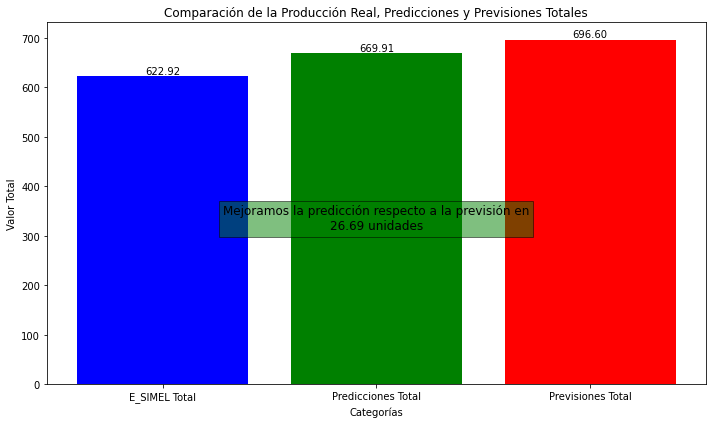

In [188]:
# Valores que cogemos para el gráfico

categorias = ['E_SIMEL Total', 'Predicciones Total', 'Previsiones Total']
valores = [suma_e_simel, sumas_totales_predicciones, sumas_previsiones]

# Creamos un gráfico de barras

plt.figure(figsize=(10, 6))
barra = plt.bar(categorias, valores, color=['blue', 'green', 'red'])

# Añadimos las etiqutas

for rect in barra:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Título del gráfico y ponemos las etiquteas a cada barra
    
plt.title('Comparación de la Producción Real, Predicciones y Previsiones Totales')
plt.xlabel('Categorías')
plt.ylabel('Valor Total')


# Ubicamos el texto de la diferencia

pos_y = valores[1] / 2
pos_x = categorias[1]
plt.text(pos_x, pos_y, f'Mejoramos la predicción respecto a la previsión en\n{diferencia:.2f} unidades', ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='green', alpha=0.5))
plt.tight_layout()
plt.show()

In [ ]:
"""   
Hemos efectuado 14 ejecuciones y el resultado ha sido 11 de ellas positivas en rangos de 10 a 54
unidades positivas para las predicciones y 3 de ellas han dado negativas en rangos de -7 a -22
unidades negativas para las predicciones.

"""